<center><h1>Workflow</h1></center>

<h2>Importing the libraries and Collection of Data</h2>
<h4>Problem Definition - Classification</h4>
<h4>Data Collection - Using load_digits dataset from sklearn.datasets</h4>

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [11]:
digits = load_digits()

In [12]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [13]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

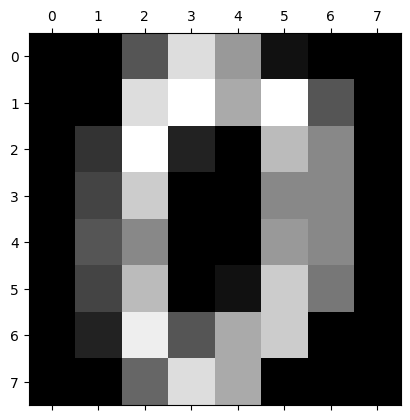

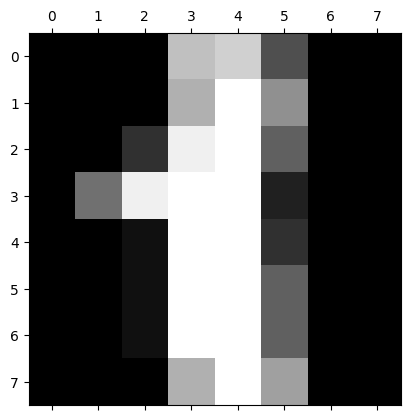

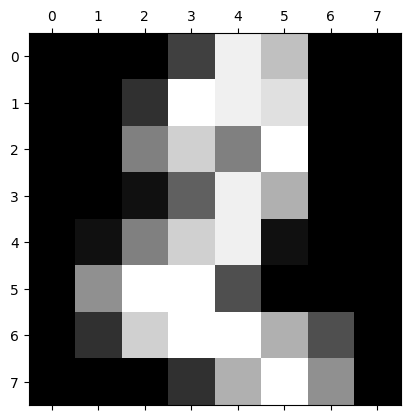

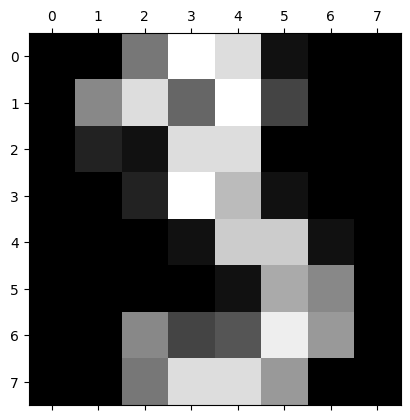

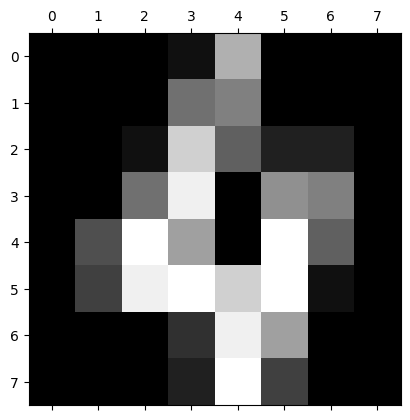

In [14]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [15]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

<h2>Data Preprocessing</h2>
<h4>Data Cleaning and Feature Engineering - The load_digits dataset from scikit-learn is quite clean as it is designed for educational purposes and benchmark testing.</h4>
<h4>Train-Test-Split - </h4>

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

<h2>Model Selection and Training</h2>
<h4>Model - LogisticRegression (Since it is Classification Problem and for this particular case logistic regression is best suited)</h4>
<h4>Training and Evaluating the model - </h4>

In [18]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [19]:
model.fit(X_train,y_train)

C:\Users\MUSKAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
model.score(X_test,y_test)

0.9638888888888889

<h2>Model Tuning</h2>
<h4>Hyperparameter Tuning - Using GridSearchCV for get better results using parameter tuning.</h4>

In [43]:
from sklearn.model_selection import GridSearchCV

clf=GridSearchCV(LogisticRegression(),{
    'C':[1,10,20],
    'solver': ['liblinear'] 
},cv=5,return_train_score=False)

clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20], 'solver': ['liblinear']})

In [44]:
clf.score(X_test,y_test)

0.9666666666666667

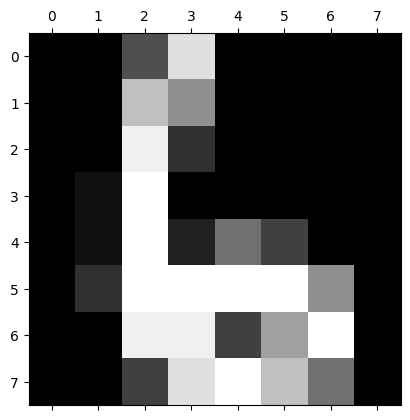

In [45]:
plt.matshow(digits.images[67])

In [46]:
digits.target[67]

6

In [47]:
clf.predict([digits.data[67]])

array([6])

In [48]:
clf.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

<h2>Data Visualization</h2>
<h4>For better understanding of the model.</h4>

In [51]:
y_predicted = clf.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 28,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  2],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 31]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

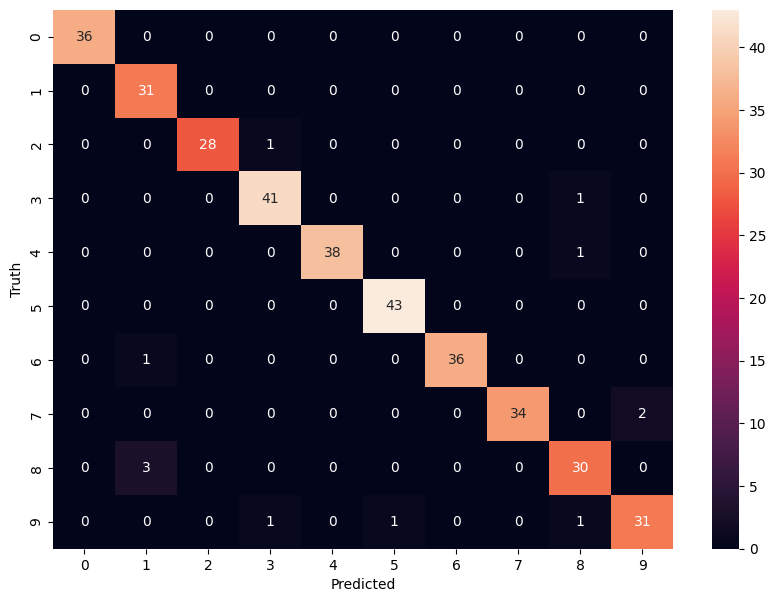

In [52]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h2>Model Saving</h2>
<h4>Using joblib to save the model.</h4>

In [53]:
import joblib
joblib.dump(clf,'load_digits_dataset')

['load_digits_dataset']

<h4>For loading the model</h4>

In [54]:
m=joblib.load('load_digits_dataset')

In [58]:
m.predict([X_test[2]])

array([0])